# Part I - (Communicate Findings with Visualization)
## by Busola Adedoyin

## Introduction

- This is a LoanData from `Prosper` contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
 
## Preliminary Wrangling


### Importing libraries and dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Programmatic Assessment and Data Understanding

In [2]:
df = pd.read_csv('prosperLoan.csv')

In [3]:
#to check the number of rows and columns present in the dataset
df.shape


(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### CLEANING DATA
- MAKING A COPY OF THE DATAFRAME BEFORE CLEANING

In [5]:
#to create a copy of the dataframe to use for our analysis
dfn = df.copy()

- DROPPING COLUMNS 

In [6]:
#dropping columns that will not needed
dfn.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
        'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LP_CustomerPrincipalPayments', 
        'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors', 'GroupKey', 'CurrentCreditLines', 'OpenCreditLines', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'InquiriesLast6Months', 'LP_CustomerPayments', 'MemberKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'EmploymentStatusDuration','CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine',
       'TotalCreditLinespast7years',  'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 
          'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ClosedDate', 'DateCreditPulled', 'MonthlyLoanPayment', 'LoanKey'], axis=1, inplace=True)

In [7]:
#to check if the dropped columns have been dropped
dfn.shape

(113937, 18)

In [8]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CreditGrade                 28953 non-null   object 
 1   Term                        113937 non-null  int64  
 2   LoanStatus                  113937 non-null  object 
 3   BorrowerAPR                 113912 non-null  float64
 4   BorrowerRate                113937 non-null  float64
 5   LenderYield                 113937 non-null  float64
 6   ListingCategory (numeric)   113937 non-null  int64  
 7   BorrowerState               108422 non-null  object 
 8   Occupation                  110349 non-null  object 
 9   EmploymentStatus            111682 non-null  object 
 10  IsBorrowerHomeowner         113937 non-null  bool   
 11  CurrentlyInGroup            113937 non-null  bool   
 12  IncomeRange                 113937 non-null  object 
 13  IncomeVerifiab

# DEFINITION OF VARIABLES EXPLORED
#### The dataset is comprised of 81 variables and contains 113937 entries. The variable that are explored in the dataset are the following: 
- CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
- Term: The length of the loan expressed in months.
- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan. 
- LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing.
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus: The employment status of the borrower at the time they posted the listing.
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.
- IncomeRange: The income range of the borrower at the time the listing was created.
- IncomeVerifiable:The borrower indicated they have the required documentation to support their income.
- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
- LoanMonthsSinceOrigination: Number of months since the loan originated.
- LoanNumber: Unique numeric value associated with the loan.
- LoanOriginalAmount: The origination amount of the loan.

## EXPLORATORY DATA ANALYSIS

In [9]:
dfn.IncomeVerifiable.unique()

array([ True, False])

In [10]:
dfn.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [11]:
dfn.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [12]:
#this is used to check the number of unique values in this column
print(dfn['Occupation'].nunique())
print(dfn['Occupation'].unique())
print(dfn['Occupation'].value_counts())
print(dfn['Occupation'].isnull().sum())

67
['Other' 'Professional' 'Skilled Labor' 'Executive' 'Sales - Retail'
 'Laborer' 'Food Service' 'Fireman' 'Waiter/Waitress' 'Construction'
 'Computer Programmer' 'Sales - Commission' 'Retail Management'
 'Engineer - Mechanical' 'Military Enlisted' 'Clerical' nan 'Teacher'
 'Clergy' 'Accountant/CPA' 'Attorney' 'Nurse (RN)' 'Analyst'
 "Nurse's Aide" 'Investor' 'Realtor' 'Flight Attendant' 'Nurse (LPN)'
 'Military Officer' 'Food Service Management' 'Truck Driver'
 'Administrative Assistant' 'Police Officer/Correction Officer'
 'Social Worker' 'Tradesman - Mechanic' 'Medical Technician' 'Professor'
 'Postal Service' 'Civil Service' 'Pharmacist' 'Tradesman - Electrician'
 'Scientist' 'Dentist' 'Engineer - Electrical' 'Architect' 'Landscaping'
 'Tradesman - Carpenter' 'Bus Driver' 'Tradesman - Plumber'
 'Engineer - Chemical' 'Doctor' 'Chemist' 'Student - College Senior'
 'Principal' "Teacher's Aide" 'Pilot - Private/Commercial' 'Religious'
 'Homemaker' 'Student - College Graduate Student'


In [13]:
print(dfn.EmploymentStatus.unique())
print(dfn.EmploymentStatus.nunique())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
8


In [14]:
""" Renaming column"""
dfn = dfn.rename(columns = {'ListingCategory (numeric)' : 'listingCategory', 'ListingCategory (numeric)' : 'listingCategory'})

In [15]:
#this is used to check the number of unique values in this column
print(dfn.LoanOriginalAmount.nunique())
print(dfn.LoanOriginalAmount.unique())
print(dfn.LoanOriginalAmount.value_counts())
print(dfn.LoanOriginalAmount.isnull().sum())

2468
[ 9425 10000  3001 ... 17669 19432  4292]
4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64
0


In [16]:
print(dfn.IsBorrowerHomeowner.nunique())
print(dfn.IsBorrowerHomeowner.unique())
print(dfn.IsBorrowerHomeowner.value_counts())

2
[ True False]
True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64


In [17]:
dfn['CreditGrade'].dtype

dtype('O')

In [18]:
dfn['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [19]:
 dfn['IsBorrowerHomeowner'] =  dfn['IsBorrowerHomeowner'].astype('bool')

In [20]:
print(dfn['CurrentlyInGroup'].nunique())
print(dfn['CurrentlyInGroup'].unique())
print(dfn['CurrentlyInGroup'].value_counts())
print(dfn['CurrentlyInGroup'].isnull().sum())

2
[ True False]
False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64
0


In [21]:
print(dfn['listingCategory'].nunique())
print(dfn['listingCategory'].unique())
print(dfn['listingCategory'].value_counts())
print(dfn['listingCategory'].isnull().sum())

21
[ 0  2 16  1  7 13  6 15 20 19  3 18  8  4 11 14  5  9 17 10 12]
1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: listingCategory, dtype: int64
0


In [22]:
dfn['listingCategory'].dtype

dtype('int64')

In [23]:
""" Renaming the details in the column for better understanding"""
"""Listingcategory is the category of listing that the borrower selected when posting their listing"""
#dfn = dfn.rename(columns = {'ListingCategory (numeric)' : 'listingCategory', 'ListingCategory (numeric)' : 'listingCategory'})
dfn['listingCategory'].replace(0, 'Not Available', inplace = True)
dfn['listingCategory'].replace(1, 'Debt Consolidation', inplace = True)
dfn['listingCategory'].replace(2, 'Home Improvement', inplace = True)
dfn['listingCategory'].replace(3, 'Business', inplace = True)
dfn['listingCategory'].replace(4, 'Personal Loan', inplace = True)
dfn['listingCategory'].replace(5, 'Student Use', inplace = True)
dfn['listingCategory'].replace(6, 'Auto', inplace = True)
dfn['listingCategory'].replace(7, 'Other', inplace = True)
dfn['listingCategory'].replace(8, 'Baby&Adoption', inplace = True)
dfn['listingCategory'].replace(9, 'Boat', inplace = True)
dfn['listingCategory'].replace(10, 'Cosmetic Procedure', inplace = True)
dfn['listingCategory'].replace(11, 'Engagement Ring', inplace = True)
dfn['listingCategory'].replace(12, 'Green Loans', inplace = True)
dfn['listingCategory'].replace(13, 'Household Expenses', inplace = True)
dfn['listingCategory'].replace(14, 'Large Expenses', inplace = True)
dfn['listingCategory'].replace(15, 'Medical/Dental', inplace = True)
dfn['listingCategory'].replace(16, 'MotorCycle', inplace = True)
dfn['listingCategory'].replace(17, 'RV', inplace = True)
dfn['listingCategory'].replace(18, 'Taxes', inplace = True)
dfn['listingCategory'].replace(19, 'Vacation', inplace = True)
dfn['listingCategory'].replace(20, 'Wedding Loans', inplace = True)

In [24]:
dfn['listingCategory'].describe()

count                 113937
unique                    21
top       Debt Consolidation
freq                   58308
Name: listingCategory, dtype: object

In [25]:
print(dfn['LoanStatus'].nunique())
print(dfn['LoanStatus'].unique())
print(dfn['LoanStatus'].value_counts())
print(dfn['LoanStatus'].isnull().sum())

12
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
0


In [26]:
print(dfn['LoanMonthsSinceOrigination'].nunique())
print(dfn['LoanMonthsSinceOrigination'].unique())
print(dfn['LoanMonthsSinceOrigination'].value_counts())
print(dfn['LoanMonthsSinceOrigination'].isnull().sum())

94
[ 78   0  86  16   6   3  11  10  22  77   2   8  23  91  12   5   4  75
  13  45  25  18  41   1  27   7  92  21  85   9  67  28  19  26  83  89
  33  84  34  36  37  68  15  88  39  24  14  74  54  31  70  50  40  79
  72  66  53  71  17  46  48  93  81  87  43  29  30  96  20  52  69  73
  90  32  82  42  80  94  51  49  44  65  76  47  38  97  55  35  95  99
  58  56  98 100]
2      5865
3      5215
5      4899
1      4485
4      4336
       ... 
56       20
58       13
100      13
99        9
98        8
Name: LoanMonthsSinceOrigination, Length: 94, dtype: int64
0


In [27]:
print(dfn['StatedMonthlyIncome'].nunique())
print(dfn['StatedMonthlyIncome'].unique())
print(dfn['StatedMonthlyIncome'].value_counts())
print(dfn['StatedMonthlyIncome'].isnull().sum())

13502
[ 3083.333333  6125.        2083.333333 ...  2608.25      1539.166667
 18756.      ]
4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64
0


In [28]:
dfn['LoanMonthsSinceOrigination'].describe()

count    113937.000000
mean         31.896882
std          29.974184
min           0.000000
25%           6.000000
50%          21.000000
75%          65.000000
max         100.000000
Name: LoanMonthsSinceOrigination, dtype: float64

In [29]:
#this is to drop the missing rows in this column
dfn['Occupation'] = dfn['Occupation'].dropna()

In [30]:
#this is used to create a  separate column for the first five occupations with highest frequency
dfn['Occupation_firstfive'] = dfn['Occupation'][0:5]

In [31]:
dfn.BorrowerRate.describe()


count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [32]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CreditGrade                 28953 non-null   object 
 1   Term                        113937 non-null  int64  
 2   LoanStatus                  113937 non-null  object 
 3   BorrowerAPR                 113912 non-null  float64
 4   BorrowerRate                113937 non-null  float64
 5   LenderYield                 113937 non-null  float64
 6   listingCategory             113937 non-null  object 
 7   BorrowerState               108422 non-null  object 
 8   Occupation                  110349 non-null  object 
 9   EmploymentStatus            111682 non-null  object 
 10  IsBorrowerHomeowner         113937 non-null  bool   
 11  CurrentlyInGroup            113937 non-null  bool   
 12  IncomeRange                 113937 non-null  object 
 13  IncomeVerifiab

In [33]:
dfn.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'listingCategory', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'Occupation_firstfive'],
      dtype='object')

### What is the structure of your dataset?

> The dataset contains 113937 observations and 81 variables but the variables have been dropped to 18 columns  to enable me understand the dataset and provide good visualizations from variables availabe

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the dataset are as follows: LoanOriginalAmount, Term, LenderYield, LoanStatus, BorrowedAPR, BorrowerRate. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'listingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination', 'LoanNumber', 'Occupation_firstfive'

## Univariate Exploration

#### Are there outliers in the BorrowerRate Column?

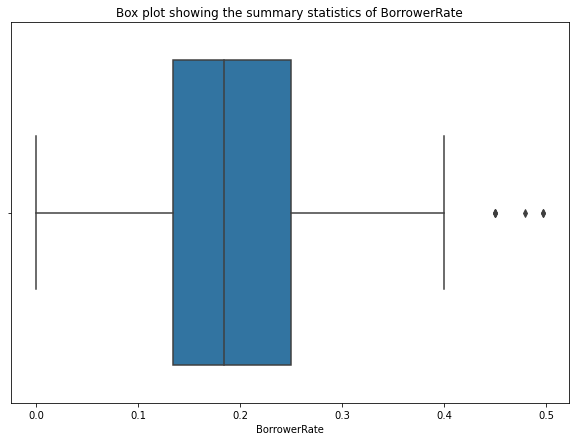

In [34]:
def BR():
    plt.figure(figsize=(10,7))
    sns.boxplot(x = 'BorrowerRate', data = df)
    plt.title('Box plot showing the summary statistics of BorrowerRate');
BR()

- From the above box plot, there seems to outliers in `BorrowerRate` from between `0.4` and `0.5`

#### How many Terms of Loan are there available in Prosper Loan and which of the loan terms is the most applied for?

In [35]:
dfn.Term.describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

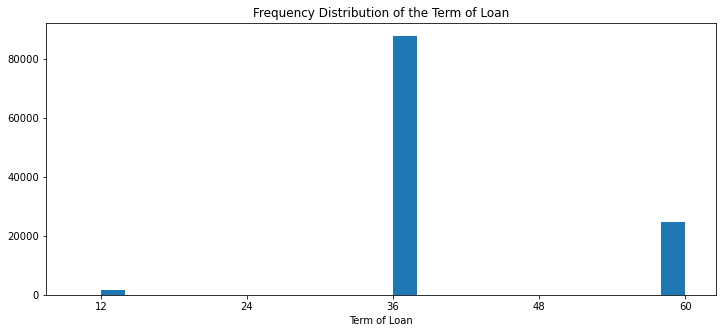

In [36]:
def termcheck():
    bin_edges = np.arange(10, 60+2, 2)
    plt.figure(figsize=(12,5))
# the rwidth parameter is used to reduce the space taken up by the bin rectangles, this is to give an illusion of the space between bins
    plt.hist(x='Term', data=dfn, bins = bin_edges)
    plt.xlabel('Term of Loan')
    plt.title('Frequency Distribution of the Term of Loan')
    plt.xticks(np.arange(12, 60+12, 12));
termcheck()

- The histogram plot shows that borrowers' were interested more in the `36-month` Loanterm amongst all the three types of loan term.

#### Question: How were the Credit Grade Rating distributed?

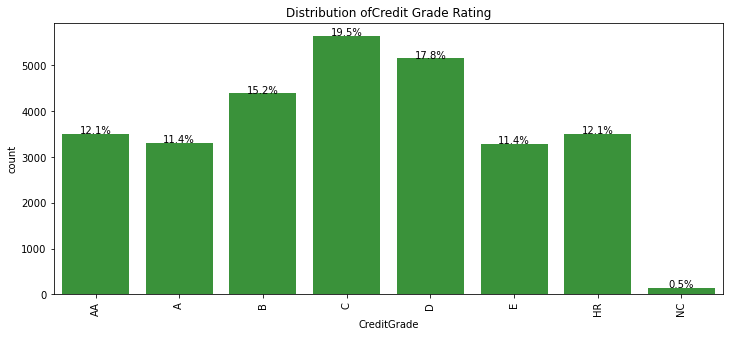

In [37]:
def CG():
    plt.figure(figsize = [12,5])
    base_color = sns.color_palette()[2]
    sns.countplot(data=df, x='CreditGrade', color = base_color, order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']);
    cg_counts = df['CreditGrade'].value_counts()
    n_cg = df['CreditGrade'].value_counts().sum()
    plt.title('Distribution ofCredit Grade Rating')

    # get the current tick locations and labels
    locs, labels = plt.xticks(rotation=90) 

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cg_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_cg)

        # print the annotation just below the top of the bar
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
CG()

- CreditGrade category is the credit rating that is assigned as at the time the listing went live and `C` category  has the highest value with 20% while category `NC` has the lowest value with 0%

#### What is the distribution of borrowers that are home owners?

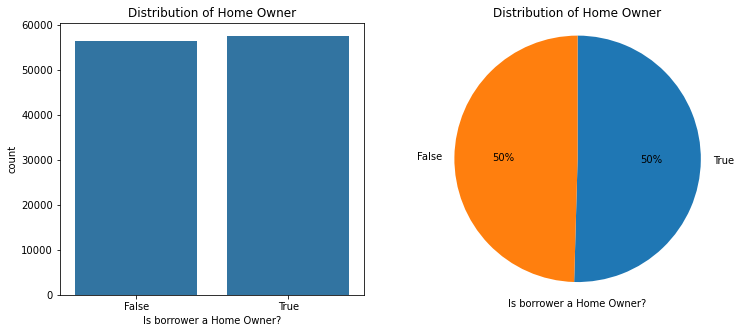

In [38]:
def IBHO():
    plt.figure(figsize = [12, 5])
    plt.subplot(1, 2, 1)
    base_color = sns.color_palette()[0]
    sns.countplot(data=dfn, x ='IsBorrowerHomeowner', color=base_color)
    plt.xlabel('Is borrower a Home Owner?')
    plt.title('Distribution of Home Owner')
    plt.subplot(1, 2, 2)
    sorted_counts = dfn['IsBorrowerHomeowner'].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.0f%%',
        counterclock = False);
    plt.xlabel('Is borrower a Home Owner?')
    plt.title('Distribution of Home Owner')
    plt.axis('square')
IBHO()

- The visualization showed that Borrowers with Home owners and borrowers without Home owners have equal distribution which means that as much as there are borrowers with Home owners, there are also borrowers without home owners

#### What is the distribution of Income Ranges amongst the Borrowers?

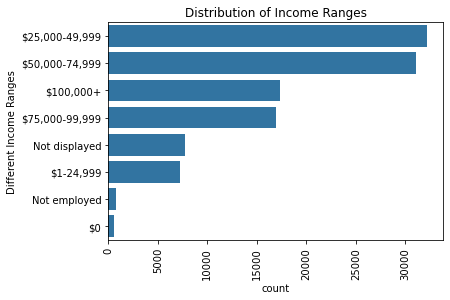

In [39]:
def IncomeR():
    IR = dfn.IncomeRange.value_counts().index
    base_color = sns.color_palette()[0]
    plt.xticks(rotation=90)
    sns.countplot(data=dfn, y ='IncomeRange', color=base_color, order=IR)
    plt.ylabel('Different Income Ranges')
    plt.title('Distribution of Income Ranges')
IncomeR()

- Most borrowers Income Range fall in the range `$25000-$49999` followed by the range `$50000 - $74999`

#### Which of the employment status had the highest borrowers?

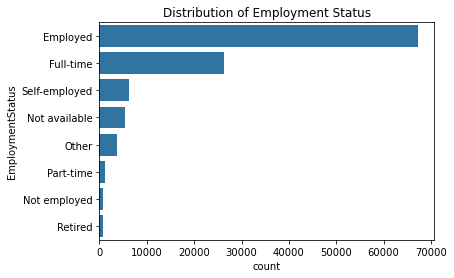

In [40]:
def employ():
    base_color = sns.color_palette()[0]
    type_order = dfn['EmploymentStatus'].value_counts().index
    sns.countplot(data=dfn, y='EmploymentStatus', color=base_color, order=type_order);
    plt.title('Distribution of Employment Status')
employ()

- The visualization showed that `Employed` category of Borrowers have the highest frequency.

#### How many borrowers are in a group?

(-1.1057325801801057,
 1.1056278816793463,
 -1.1002235192662622,
 1.1111369425931898)

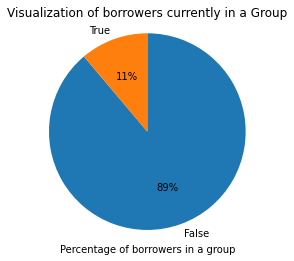

In [41]:
#CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.
sorted_counts = dfn['CurrentlyInGroup'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.0f%%',
        counterclock = False);
plt.xlabel('Percentage of borrowers in a group')
plt.title('Visualization of borrowers currently in a Group')
plt.axis('square')

- `CurrentlyInGroup` Specifies whether or not the Borrower was in a group at the time the listing was created and from the pie chart plotted,  it can be seen that there are only 11% of borrowers in a group as at the time of the listing.

#### What Category of Listing is the most popular amongst all the category of listing?

Text(0.5, 1.0, 'Borrower selection when listing')

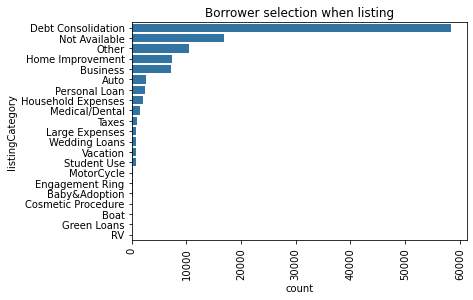

In [42]:
base_color = sns.color_palette()[0]
type_order = dfn['listingCategory'].value_counts().index
sns.countplot(data=dfn, y='listingCategory', color=base_color, order=type_order);
plt.xticks(rotation=90)
plt.title('Borrower selection when listing')

- The Observation from the visualization indicates that `Debt Consolidation` with a frequency of `58308` takes the lead in the list of categories that borrowers selected when posting their listing while `RV` is the least selected with a frequency of `52`



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

#### How is the Loan Months distributed using a histogram plot since Origination?

In [43]:
dfn['LoanMonthsSinceOrigination'].describe()

count    113937.000000
mean         31.896882
std          29.974184
min           0.000000
25%           6.000000
50%          21.000000
75%          65.000000
max         100.000000
Name: LoanMonthsSinceOrigination, dtype: float64

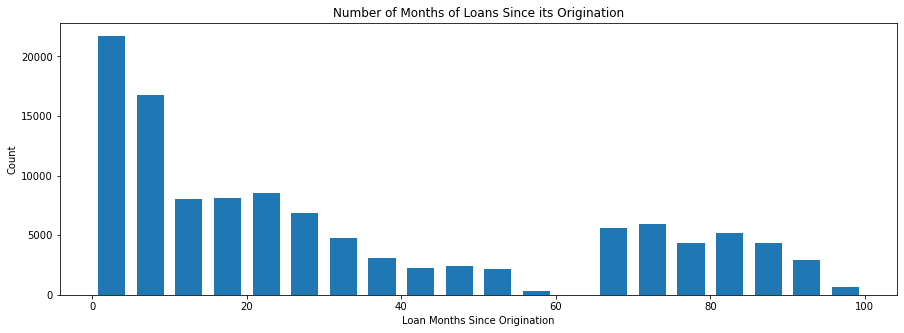

In [44]:
def LMSO():
    plt.figure(figsize = [15, 5])
    bins = np.arange(0, dfn['LoanMonthsSinceOrigination'].max()+5, 5)
    plt.hist(dfn['LoanMonthsSinceOrigination'], bins = bins, rwidth=0.7)
    plt.xlabel('Loan Months Since Origination')
    plt.ylabel('Count')
    plt.title('Number of Months of Loans Since its Origination')
LMSO()

- The indication from the peak of the chart shows that number of months since loam oroginated for most borrowers are at the 2nd month followed by 3-month.

#### What is the distribution of Loan Amount?

In [45]:
dfn.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

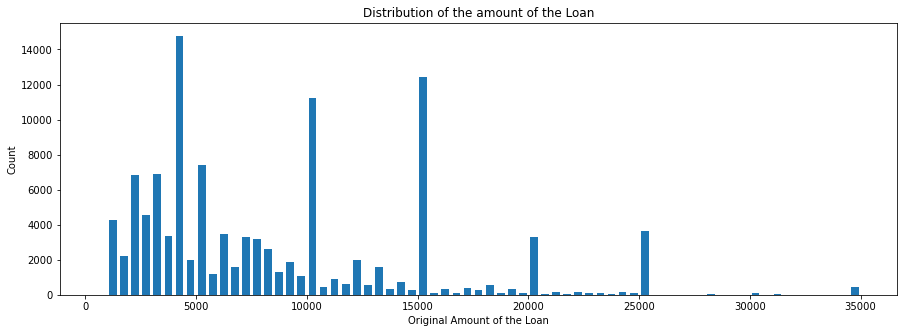

In [46]:
def loan_amount():
    plt.figure(figsize = [15, 5])
    bins = np.arange(500, dfn['LoanOriginalAmount'].max()+500, 500)
    plt.hist(dfn['LoanOriginalAmount'], bins = bins, rwidth=0.7)
    plt.xlabel('Original Amount of the Loan')
    plt.ylabel('Count')
    plt.title('Distribution of the amount of the Loan')
loan_amount()

- Most Loan amount are in the ranges `$5000`, `$10000` and `$15000`

#### What are the five topmost Occupations of Borrowers?

<AxesSubplot:title={'center':'Top Five Occupations'}, ylabel=' '>

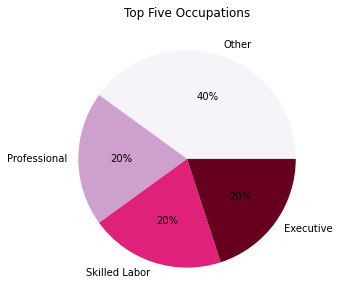

In [47]:
dfn['Occupation_firstfive'].value_counts().plot(kind='pie', shadow=False,cmap='PuRd',figsize=(10,5), autopct='%.0f%%', title='Top Five Occupations', ylabel = ' ')

- `Other` Occupation took the highest percentage with a frquency of 40% while `Professional`, `Skilled Labor` and `Executive` shared the remaining 60% with 20% being apportioned to each.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


1. There are `three` terms of loan available and the 36th term has the highest distribution which shows that people apply more loans with 3 years validity.
2. CreditGrade category is the credit rating that assigned as at the time the listing went live and `C` has the highest value while category `NC` has the lowest value

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. For the ListingCategory,It was difficult to understand what the numbers are doing so based on the documentation given and for a better understanding of what the column is all about, I replaced the integer values with string values.
2. There were 67 types of Occupation listed in the column for `Occupation` but I did a Pie Chart Visualization of the first five types of Occupations with the highest frequency.

## Bivariate Exploration

#### Is there a correlation between Stated Monthly Income and Loan Amount given?

plt.figure(figsize=(10,7))
plt.scatter(x='StatedMonthlyIncome',y='LoanOriginalAmount', data=dfn, alpha=0.7, jitter=0.2)
plt.ylabel('Loan Original Amount')
plt.title('Does Monthly Income affect the Amount of Loan given');

- There is no correlation between the Loan Amount Given and The Stated Monthly Income

#### What Relationship can be deduced from Employment Status and Income Range of Borrowers?

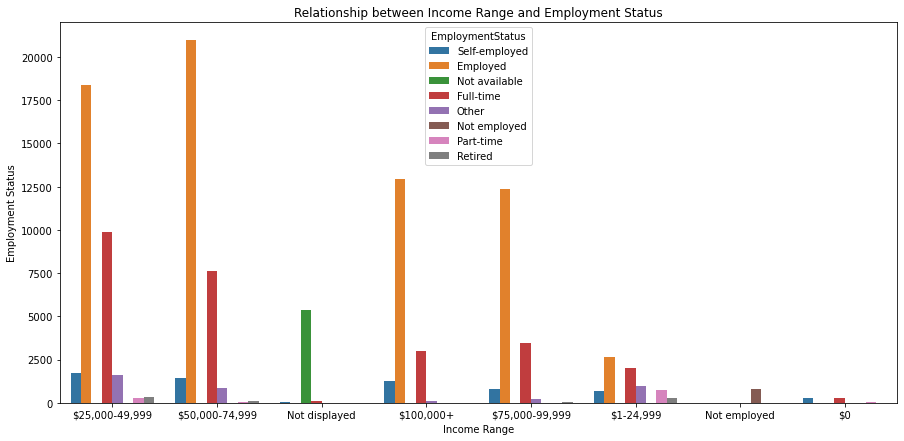

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(x='IncomeRange', data=dfn, hue='EmploymentStatus');
plt.xlabel('Income Range')
plt.ylabel('Employment Status')
plt.title('Relationship between Income Range and Employment Status');

- Most Employed borrowers fall in all the categories of the Income range but the EmploymentStatus which is `Not available` has the highest frequency of Income Range that has their income range not displayed.

#### How is  Loan Number  distributed amongst  Borrowers that are Home owners  and Borrowers that are not Home owners?

In [49]:

dfn.groupby('IsBorrowerHomeowner').sum()['LoanNumber'].sort_values(ascending =False)

IsBorrowerHomeowner
True     4160225466
False    3752069599
Name: LoanNumber, dtype: int64

<AxesSubplot:title={'center':'Distribution of Borrower who are Home owner in relation to Loan term'}, ylabel=' '>

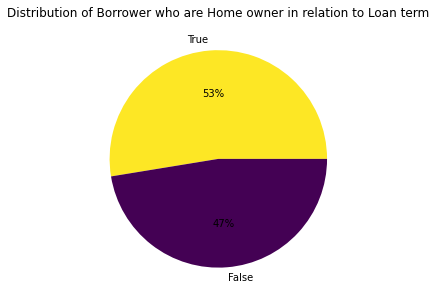

In [50]:
dfn.groupby('IsBorrowerHomeowner').sum()['LoanNumber'].sort_values(ascending =False).plot(kind='pie', shadow=False,cmap='viridis_r', autopct='%.0f%%',
                                                                                figsize=(10,5), 
                                                                                title='Distribution of Borrower who are Home owner in relation to Loan term' , ylabel = ' ')

- 53% of Borrowers who are Home owners has Loan Numbers while the remaining 47% of borrowers who are not home owners has Loan number

#### What can be deduced from the relationship between CreditGrade and Borrowerrate?

<AxesSubplot:title={'center':'Distribution of Credit Rating in relation to Loan Term'}, ylabel=' '>

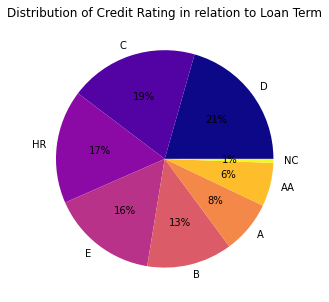

In [51]:
dfn.groupby('CreditGrade').sum()['BorrowerRate'].sort_values(ascending =False).plot(kind='pie', shadow=False,cmap='plasma', autopct='%.0f%%',
                                                                                figsize=(10,5), 
                                                                                title='Distribution of Credit Rating in relation to Loan Term' , ylabel = ' ')

- The Chart shows that CreditGrade `D` has the highest borrowerrate followed by CreditGrade `C` while the remaining percentage was shared between CreditGrade `HR`, `E`, `B`, `A`, `AA` and `NC`.

### Is there a correlation between the Term of Loan and the number of Months since Loan Originated?

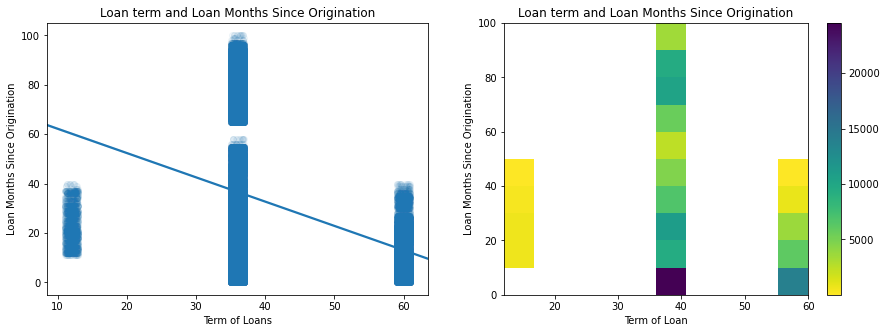

In [52]:
def LoantermLoanOrigination():
    plt.figure(figsize = [15, 5])
    plt.subplot(1, 2, 1)
    sns.regplot(data = dfn, x = 'Term' , y ='LoanMonthsSinceOrigination', truncate=False,  x_jitter=1.0, scatter_kws={'alpha':1/20});
    plt.xlabel('Term of Loans')
    plt.ylabel('Loan Months Since Origination')
    plt.title('Loan term and Loan Months Since Origination')
    plt.subplot(1, 2, 2)
    plt.hist2d(data =dfn, x = 'Term', y = 'LoanMonthsSinceOrigination', cmin=0.5, cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('Term of Loan')
    plt.ylabel('Loan Months Since Origination');
    plt.title('Loan term and Loan Months Since Origination')
LoantermLoanOrigination()

- There is a negative correlation between term of Loan and Number of Months Since Loan was Originated.

#### How does LenderYield vary across the Different length of  loan term?

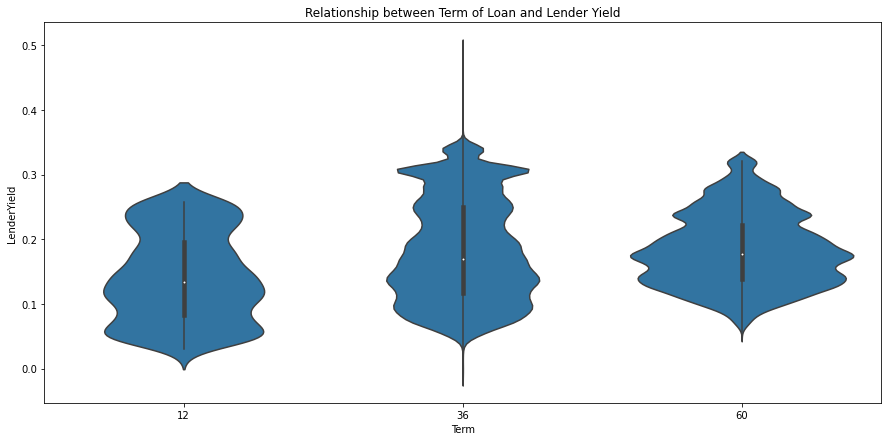

In [53]:
def TermLender():
    plt.figure(figsize=(15,7))
    sns.violinplot(x='Term', y='LenderYield', data=dfn, color=base_color);
    plt.title('Relationship between Term of Loan and Lender Yield')
TermLender()

- Most `12-month` Loanterm seems to take LenderYield values between  < 0.0 and 0.2 but there seems to be increase in the LenderYield Value for `36-month` loan term then a decline in the  `60-month` loan Term.

#### Are All Income given by borrowers verifiable?

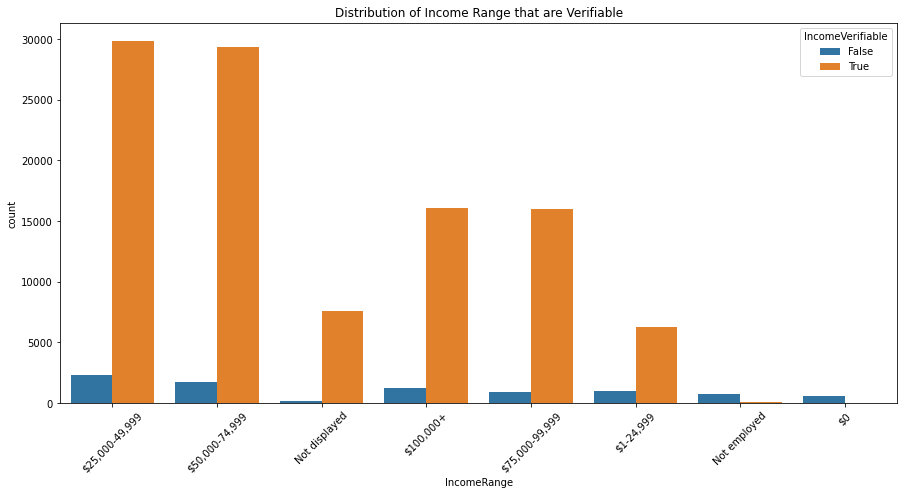

In [54]:
def RangeVerifiable():
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=45)
    sns.countplot(x='IncomeRange', data=dfn, hue='IncomeVerifiable');
    plt.title('Distribution of Income Range that are Verifiable')
RangeVerifiable()

- From the Clustered Bar Chart Plotted, Most Income Ranges are verifiable.

### Is there any correlation between Term of Loan and the Status of Loan?

In [55]:
loan_statuses = ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff',
 'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
 'Past Due (31-60 days)', 'Past Due (91-120 days)' ,'FinalPaymentInProgress'
 'Past Due (>120 days)']
# Returns the types for loan_statuses with the categories and orderedness
loanstatuses = pd.api.types.CategoricalDtype(ordered=True, categories=loan_statuses)
# Use pandas.astype() to convert the "LoanStatus" column from a plain object type into an ordered categorical type
dfn['LoanStatus'] = dfn['LoanStatus'].astype(loanstatuses);


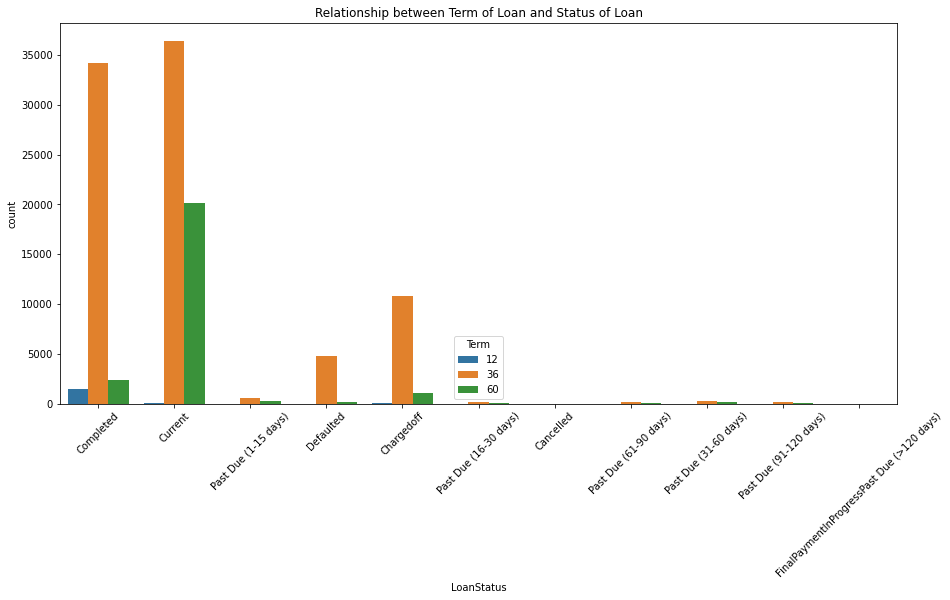

In [56]:
def TermLoanStatus():
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=45)
    sns.countplot(x='LoanStatus', data=dfn, hue='Term');
    plt.title('Relationship between Term of Loan and Status of Loan')
TermLoanStatus()

- The 36th TermLoan is the most common amongst all Loan Statuses but the 36 Term loan has the highest frequency for the `Current` Loan Status

#### Is there a correlation between Borrower's Interest rate, LenderYield and Borrowers Annual percentage Rate?

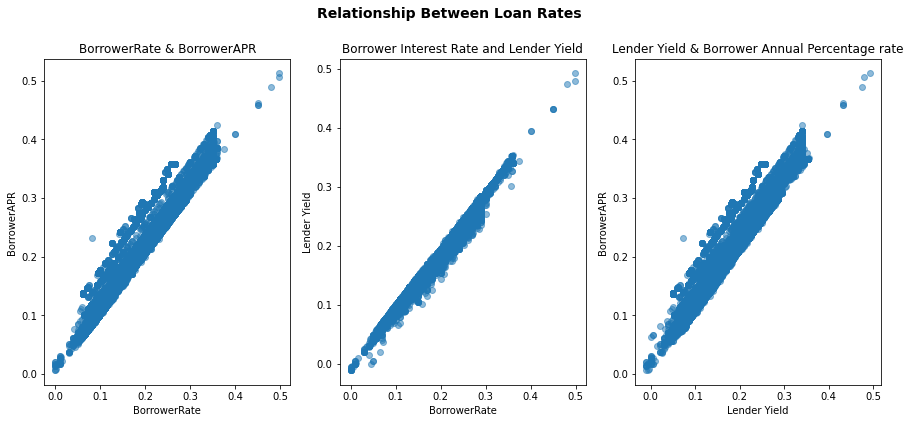

In [57]:
def borrower():
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    plt.scatter(x='BorrowerRate',y='BorrowerAPR', data=dfn, alpha=0.5)
    plt.xlabel('BorrowerRate')
    plt.ylabel('BorrowerAPR')
    plt.title('BorrowerRate & BorrowerAPR');
    plt.subplot(1,3,2)
    plt.scatter(x='BorrowerRate',y='LenderYield', data=dfn, alpha=0.5)
    plt.xlabel('BorrowerRate')
    plt.ylabel('Lender Yield')
    plt.title('Borrower Interest Rate and Lender Yield');
    plt.subplot(1,3,3)
    plt.scatter(x='LenderYield',y='BorrowerAPR', data=dfn, alpha=0.5)
    plt.xlabel('Lender Yield')
    plt.ylabel('BorrowerAPR')
    plt.title('Lender Yield & Borrower Annual Percentage rate');
    plt.suptitle('Relationship between Loan rates'.title(), y =1, fontsize =14, weight="bold")
borrower()

- From the scatter plot chart above, the visualization shows that there is a very strong positive correlation between the three loan rates used by ProsperLoan Company in applying for Loans.

### IS THERE A CORRELATION AMONG THE NUMERICAL VARIABLES PRESENT IN THE DATASET?

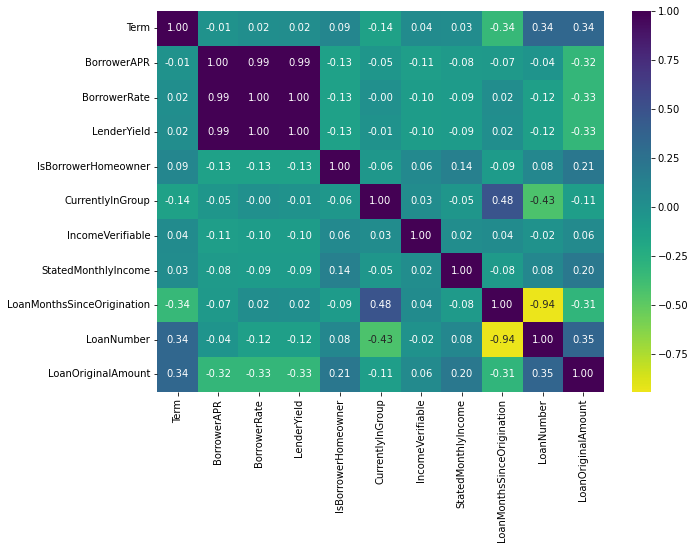

In [58]:
def heat():
    plt.figure(figsize=(10,7))
    sns.heatmap(dfn.corr(), annot = True, fmt = '.2f', cmap = 'viridis_r', center = 0)
heat()

- THERE IS A VERY STRONG CORRELATION AMONG ALL THE NUMERICAL VARIABLES PRESENT IN THE DATASET

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The 36th Term Loan as seen from the observation is the loan term that is being applied for the same  out of the three loan terms

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a negative correlation between term of Loan and Number of Months Since Loan was Originated.

## Multivariate Exploration

#### Relationship between lenderyield, Borrower Annual Percentage Rate and Borrower InterestRate

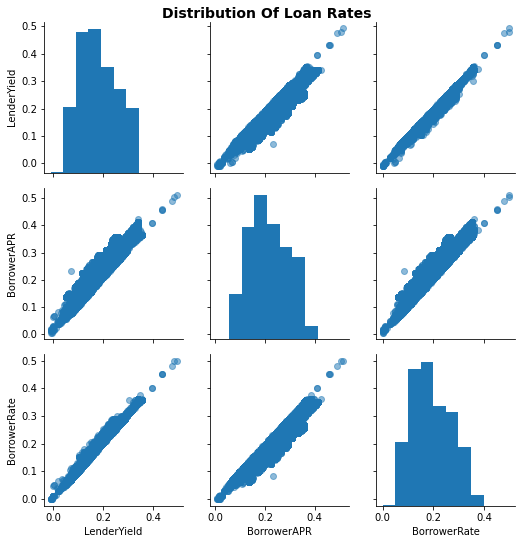

In [59]:
def pair_rates():
    g = sns.PairGrid(data = dfn, vars = ['LenderYield', 'BorrowerAPR', 'BorrowerRate'])
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter, alpha=0.5) 
    plt.suptitle('Distribution of Loan rates'.title(), y =1, fontsize =14, weight="bold")
pair_rates()

- On the diagonals, where the row and column variables match, a histogram is plotted. Off the diagonals, a scatterplot between the two variables is created. There is a very strong positive correaltion anonsgt the three variables above.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
##### Definition of LenderYield, BorrowerAPR and BorrowerRate
- LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan. 
- The three above are the three different types of rates used for giving loans and based on the plot, they all have very strong positive correlation.

### Were there any interesting or surprising interactions between features?

- The LenderYield, BorrowerAPR and BorrowerRate features shows an interesting observation but not suprising one because they all have positive correlation which shows that they are related to each other because they are the rates used for giving loans to borrowers

## Conclusions
### Summary of Findings
- From the plotted heatmap visualization, the numerical varaibles used for the visualization all have 
- There are only three types of Loan term present in the dataset as seen from the plotted graphs and the Loan term with the 3-year Loan term has the highest frequency which is an indication that Borrowers opted more for it.
- There seems to outliers in `BorrowerRate` from between `0.4` and `0.5`
- Borrowers' showed interest more in the `36-month` Loanterm amongst all the three types of loan term.
- CreditGrade category is the credit rating that is assigned as at the time the listing went live and `C` category  has the highest value with 20% while category `NC` has the lowest value with 0%
- Borrowers with Home owners and borrowers without Home owners have equal distribution which means that as much as there are borrowers with Home owners, there are also borrowers without home owners
- Most borrowers Income Range fall in the range `$25000-$49999` followed by the range `$50000 - $74999`
- `Employed` category of Borrowers have the highest frequency.
- `CurrentlyInGroup` Specifies whether or not the Borrower was in a group at the time the listing was created and from the pie chart plotted,  it can be seen that there are only 11% of borrowers in a group as at the time of the listing.
- `Debt Consolidation` with a frequency of `58308` takes the lead in the list of categories that borrowers selected when posting their listing while `RV` is the least selected with a frequency of `52`
-  The indication from the peak of the chart shows that number of months since loam oroginated for most borrowers are at the 2nd month followed by 3-month.
- `Other` Occupation took the highest percentage with a frquency of 40% while `Professional`, `Skilled Labor` and `Executive` shared the remaining 60% with 20% being apportioned to each.
- Most Employed borrowers fall in all the categories of the Income range but the EmploymentStatus which is `Not available` has the highest frequency of Income Range that has their income range not displayed.
- 53% of Borrowers who are Home owners has Loan Numbers while the remaining 47% of borrowers who are not home owners has Loan number
- The Chart shows that CreditGrade `D` has the highest borrowerrate followed by CreditGrade `C` while the remaining percentage was shared between CreditGrade `HR`, `E`, `B`, `A`, `AA` and `NC`.
- Most `12-month` Loanterm seems to take LenderYield values between  < 0.0 and 0.2 but there seems to be increase in the LenderYield Value for `36-month` loan term then a decline in the  `60-month` loan Term.
